# Table of Content<a class="anchor" id="table-of-content"></a>
* [1. Problem Introduction and Motivation](#problem-introduction)
* [2. Libraries and Custome Functions](#libraries)
* [3. Data Preparation and Modeling](#modeling)
* [4. Training and Testing Model](#train-test-model)
* [5. Machine Learning](#machine-learning)
* [6. References and Sources](#references-sources)
* [7. Deployment](#deployment)

# 1.Problem Introduction and Motivation<a class="anchor" id="problem-introduction"></a>
* [Go to Top](#table-of-content)
<img src='https://d57439wlqx3vo.cloudfront.net/iblock/f5d/f5dcf76697107ea302a1981718e33c95/1f68f84b53199df9cae4b253225eae63.png'/>
     
### Problem  Introduction and Motivation
>The amount of resources in a company are limited. It is important for the HR department to allocate the resources appropriately which creates the maximum benefits for the company. Keep on track with the tasks in the company can help HR department decide how it should allocate the resources to complete the tasks on time. We want to use machine learning to successfully predict task completions, which can help HR department make decisions about resources allocation.
### Q & A
>**What is the prediction we are trying to make?**<br>
>We want to predict the task completions in the company.<br><br>
>**Why is it important?  Who cares?**<br>
>With the prediction, HR department in the company can allocate the resources better and increase the possiblity of task completions. Managers might want to utilize this prediction to gain an insight of the task progress. Shareholders might want to utilize this prediction to focus on tasks that can earn more revenue for the company.<br><br>
>**What are the possible actions that could be taken as a result of this work?**<br>
>HR department can allocate the resources and try to make all the tasks complete. But if the resources is not enough, HR department can dicsuss with mangagers or executives to decide the priority of the tasks.<br><br>

# 2. Libraries and Custome Functions<a class="anchor" id="libraries"></a>
* [Go to Top](#table-of-content)

In [17]:
import pandas as pd
# pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with
# "relational" or "labeled" data both easy and intuituve.

pd.options.display.float_format = '{:.2f}'.format
# ask pandas to display float values to two decimal places.

import numpy as np
# numpy is a Python library used for working with arrays. Is also has functions for working in domain of linear 
# algebra, fourier transform, and matrices.

import math
# math module allows you to perform mathematical tasks on numbers.

import statsmodels.api as sm
# statsmodels is a Python package that allows users to explore data, estimate statistical models, and perform 
# statistical tests. API stands for application programming interface, an API acts as a communication layer, or as 
# an interface that allows different systems to talk to each other without having to understand exactly what each 
# other does.

import pickle
# pickle is a module that is used for serializing and de-reserializing a Python object structure.

import matplotlib.pyplot as plt
# matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.

import seaborn as sns
# seaborn is a data visualization library for statistical graphic plotting in Python, and it is based on matplotlib.

import plotly.graph_objects as go
# plotly.graph_objects is a module that contains an automatically generated hierarchy of Python classes which 
# represent non-leaf nodes in this figure schema.

from sklearn.linear_model import LogisticRegression
# sklearn.linear_model is a machine learning package. It offers a set of fast tools for machine learning and 
# statistical modeling, such as classification, regression, clustering, and dimenstionality reduction, and we want
# to import LogisticRegression tool from sklearn.linear_model.

from sklearn import metrics
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance.

from sklearn.metrics import accuracy_score
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance, the accuracy_score function calculates the accuracy score for a set of predicted labels against the 
# true labels.

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance, and we want to use the functions we import to calculate mean absolute percentage error(MAPE), mean 
# absolute error(MAE), R2 score, and mean squared error(MSE).

from sklearn.model_selection import train_test_split
# train_test_split function of the sklearn.model_selection package splits array or matrices into random subsets
# for train and test data.

from sklearn.linear_model import LinearRegression
# LinearRegression function contains different functions for performing machine learning with linear models.

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
# NearestNeighbors function helps us finding he nearest neighbors between two sets of data, KNeighborsClassifier
# implements the k-nearest neighbors vote.

from sklearn.metrics import confusion_matrix

In [18]:
# Create a function for getting statistical values, it use dictionary to get the value of the of different measurements of 
# the data.
def my_summary_stats(X,feature_list):
    temp = pd.DataFrame(dict(mean = X[feature_list].mean().round(2),
                             median = X[feature_list].median().round(2),
                             std_dev = X[feature_list].std().round(2),
                             min_val = X[feature_list].min().round(2),
                             max_val = X[feature_list].max().round(2),
                             outlier_issue = np.where(X[feature_list].std()/X[feature_list].mean() > 2,
                                                      True,False)
                            ))
    return temp

def target_by_cats(X):
    '''
    This function assumes the input dataframe (X) has a numerically defined target
    variable in the first column and that all remaining features are categorical
    '''
    global_mean = X.iloc[:,0].mean()
    target = X.columns[0]
    for col in X.columns[1:]:
        df_group = X.groupby(by=col)[target].agg(['mean']).round(2)
        df_group['diff'] = (df_group['mean'] - global_mean).round(2)
        display(df_group)

In [19]:
# Create a function for training and testing data
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    
    train_metrics = [r2, adj_r2,
                     mean_absolute_error(y_train,y_hat).round(3),
                     mean_absolute_percentage_error(y_train,y_hat).round(3)*100,
                     (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
                    ]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    print(all_metrics)

In [20]:
# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"Threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy,
                           "F1": F1,
                          })

    # Let's look at our dataframe
    return result

# 3.Data Preparation and Modeling<a class="anchor" id="modeling"></a>
* [Go to Top](#table-of-content)

In [21]:
df = pd.read_csv('SystemAdministrators.csv')
# df means data frame, the read_csv() function is used to retrieve data from from csv file, and this function is 
# in the pandas package so there is a pd. in front of the function.

df.info()
# Look at the information of the data frame.

df.tail()
# Look at the last 5 records of the data frame.

# df.head()
# Look at the first 5 records of the data frame.

pd.set_option('display.max_rows', None)
# Setting the max row number we want to display, the default is 10 and if we set the value as None, it will display
# all the rows.

# Taking a look at task_completed, training_level4, training_level6, training_level8 since they all seems to be 
# binary.
#df['task_completed']
#df['training_level4']
#df['training_level6']
#df['training_level8']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   task_completed       75 non-null     int64  
 1   employee_experience  75 non-null     float64
 2   training_level4      75 non-null     int64  
 3   training_level6      75 non-null     int64  
 4   training_level8      75 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 KB


>**Initail evaluations and observations of the data:**<br>
>>**Records:** 75 (since starting from 0 to 74)<br>
>>**Features in current data(total 5 features):** task_completed, employee_experience, training_level4, training_level6, training_level8<br>
>>**Potential features that we can add in the future:** task difficulty, task completed duration, other training levels<br>
>>**Data Type:** Reasonable(the actual data type is same as we expected)<br>
>>**Target Feature:** task_completed
>>- After taking a look at the features, we found out that the values in task_completed, training_level4, training_level6, and training_level8 are all binary. For the task_completed feature, we assumed that 1 means task completed and 0 means task uncompleted. For the three types of training level, we assumed that 1 means the employee had finished the training course and 0 means not.<br>
>>- We assume that higher level of training might lead to higher probabilty of task completion.<br>
<br><br>

| Feature             | Thoughts/Expectations(impact on task_completed)       |Actual Data Type|Expected DataType|
|-------------------- |-------------------------------------------------------|----------------|-----------------|
| task_completed:     | do the task completed or not(target variable)         |int64           |int              |
| employee_experience:| employee's working experience in the company(year)(++)|float64         |float            |
| training_level4:    | training of level 4 for the employee(+)               |int64           |int              |
| training_level6:    | training of level 6 for the employee(+)               |int64           |int              |
| training_level8:    | training of level 8 for the employee(+)               |int64           |int              |              	

In [22]:
# Removing duplicates and compare the number of records before and after removing duplicates.
print('Number of records:', len(df))
df.drop_duplicates()
print('Number of records after dropping dupes:', len(df))

# Finding the total missing values for each column.
df.isnull().sum()

Number of records: 75
Number of records after dropping dupes: 75


task_completed         0
employee_experience    0
training_level4        0
training_level6        0
training_level8        0
dtype: int64

>**Initail cleanup summary:**<br><br>
*No duplicates in our data frame*<br><br>
*No missing values in our data frame*<br>

In [23]:
# Identify all the numeric columns in the data frame and then show some statistics, we transpose the data frame by
# adding .T at the end
df.describe().T

,count,mean,std,min,25%,50%,75%,max
task_completed,75.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
employee_experience,75.00,6.80,2.27,2.70,5.20,6.30,7.85,13.70
training_level4,75.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
training_level6,75.00,0.17,0.38,0.00,0.00,0.00,0.00,1.00
training_level8,75.00,0.07,0.25,0.00,0.00,0.00,0.00,1.00


>**Feature observation:**<br><br>
>1. All of the features are numerical variables.
>2. All the feature seems to be binary except employee_experience.
>3. Looking at the mean of the task_completed, we realize that in the data frame, 20 percent of task are completed.
>4. Looking at the mean of the training_level4, we realize thet in the data frame, 76 percent of employee had finished level 4 training.
>5. Looking at the mean of the training_level6, we realize thet in the data frame, about 17 percent of employee had finished level 6 training.
>6. Looking at the mean of the training_level8, we realize thet in the data frame, about 7 percent of employee had finished level 8 training.
>7. It seems that as the training level increases, we percent of finishing the training decreases, so we assumed that there is a positive correlation between the training level and the difficulty of the training.

In [24]:
# Create a dataframe that only contains numerical variables and use the funtion 'my_summary_stats' to gain an insight
# of the statistical value of the variables.
numerical_vars = ['task_completed', 'employee_experience', 'training_level4', 'training_level6', 'training_level8']
my_summary_stats(df,numerical_vars)

,mean,median,std_dev,min_val,max_val,outlier_issue
task_completed,0.20,0.00,0.40,0.00,1.00,True
employee_experience,6.80,6.30,2.27,2.70,13.70,False
training_level4,0.76,1.00,0.43,0.00,1.00,False
training_level6,0.17,0.00,0.38,0.00,1.00,True
training_level8,0.07,0.00,0.25,0.00,1.00,True


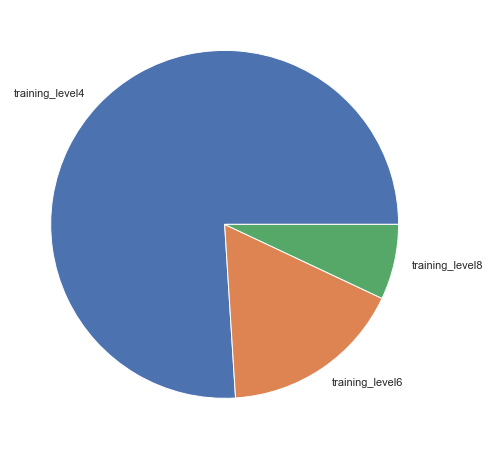

In [25]:
# Creating a pie chart for the three types of training levels to see the their proportions.
y = np.array([0.76, 0.17, 0.07])
training_levels = ["training_level4", "training_level6", "training_level8"]
plt.pie(y, labels = training_levels)
plt.show()

>**Further investigation of training_level features:**<br><br>
>1. The sum of the means of all types of training level is 0.76 + 0.17 + 0.07 = 1.
>2. The above result is very close to 1 so we can conclude that each employee row matches a training level.
>3. Based of the above results, we assumed that the data frame only keep track of each employee's highest training level.
>4. The proportion of training_level4 is relatively high compared to the other two training levels.

<AxesSubplot:xlabel='task_completed'>

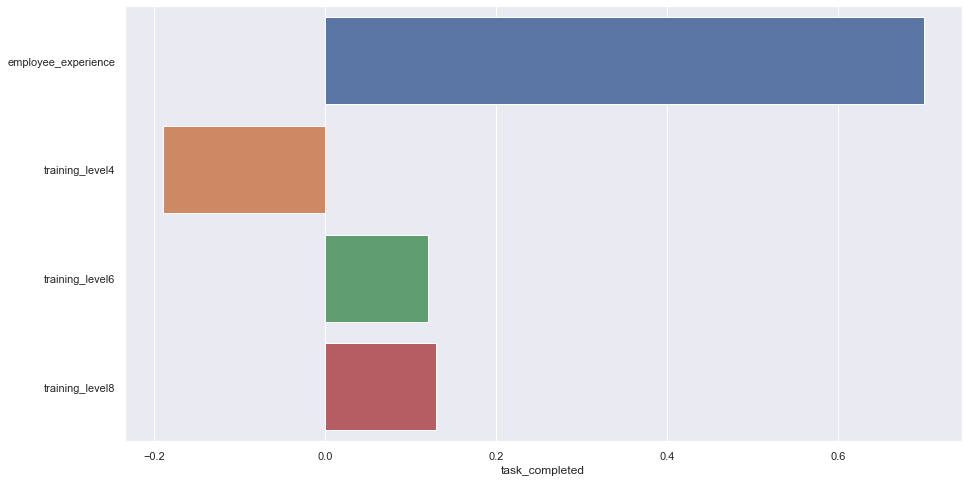

In [26]:
# Find the correlations between our target variable and the remaining numerical features.
# Instead of displaying in a heatmap or table, let's drop those values into a horizontal barchart
# for easier viewing.
a = df[numerical_vars].corr()[['task_completed']].round(2)
sns.set(rc= {'figure.figsize':(15,8)})
sns.barplot(x=a.task_completed[1:],y=a.index[1:],data=a, orient='h')

> **Initial evaluations and observations of numerical features by using barchart:**<br><br>
>The correlations between task_completed and other features:
>1. employee_experience (+): Same as we expected. Longer working years means the employee has more experience and know better how to make the task complete in time.
>2. training_level4 (-): Not as we expected. Maybe it is because the training level is too low that it isn't very helpful for the task completion.
>3. training_level6 (+): Same as we expected. Training level 6 seems to be enough to help the employee make the task complete in time.
>4. training_level8 (+):Same as we expected. Although training level 8 seems to have a positive correlation with the completion, the correlation doesn't increase very much compared to training level 6, so we might want to discuss the necessity of training level 8 in the future.

# 4.Training and Testing Model<a class="anchor" id="train-test-model"></a>

* [Go to Top](#table-of-content)

> **Data Partitioning:** <a class="anchor" id="data-split"></a>
<br><br>
>**To Do**:
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

In [27]:
# predictors = ['employee_experience', 'training_level4', 'training_level6', 'training_level8']
target = ['task_completed']

# X = df[predictors]
X = df.drop(target,axis=1) 
# Putting all the features except our target feature into X

y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=1)

> **Data Normalization:** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>OPTIONAL - though it is a good idea to get in the habit of doing this when working with the kNN classifier

In [28]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

# 5.Machine Learning<a class="anchor" id="machine-learning"></a>
- [X] [kNN Model](#knn-model)
- [X] [Logistic Model](#logistic-model)
- [X] [Winning Model](#decision)
* [Go to Top](#table-of-content)

> **kNN Model:** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>1. kNN(k-nearest neighbors) works by finding distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label.
>2. Fit numerous kNN models using different values for k. <br>
>3. We use odd values for k to avoid two feaures getting the same number.
>2. Choose the "best" value for "k" based on Accuracy.

In [29]:
# Train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put TN, TP, FN, FP, Precision, Recall, F1, Accuracy in results object
    results.append({'k':k,
                    'TP':metrics.confusion_matrix(y_test, y_pred_class)[1,1],
                    'TN':metrics.confusion_matrix(y_test, y_pred_class)[0,0],
                    'FP':metrics.confusion_matrix(y_test, y_pred_class)[0,1],
                    'FN':metrics.confusion_matrix(y_test, y_pred_class)[1,0],
                    'Precison':metrics.precision_score(y_test, y_pred_class).round(3),
                    'Recall':metrics.recall_score(y_test, y_pred_class).round(3),
                    'Accuracy':metrics.accuracy_score(y_test,y_pred_class),
                    'F1':metrics.f1_score(y_test, y_pred_class).round(2),
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,k,TP,TN,FP,FN,Precison,Recall,Accuracy,F1
0,1,1,19,2,1,0.33,0.50,0.87,0.40
1,3,2,19,2,0,0.50,1.00,0.91,0.67
2,5,1,19,2,1,0.33,0.50,0.87,0.40
3,7,0,20,1,2,0.00,0.00,0.87,0.00
4,9,0,20,1,2,0.00,0.00,0.87,0.00
5,11,0,19,2,2,0.00,0.00,0.83,0.00
6,13,0,19,2,2,0.00,0.00,0.83,0.00
7,15,0,20,1,2,0.00,0.00,0.87,0.00
8,17,0,21,0,2,0.00,0.00,0.91,0.00
9,19,0,21,0,2,0.00,0.00,0.91,0.00


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 3 as this is the lowest value that achieves the highest accuracy value.<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values.

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.92
Testing data Accuracy: 0.91


>**Overfitting evaluation:**<a class="anchor" id="logistic-model"></a>
<br>
>The Training data Accuracy and Testing data Accuracy are close in kNN Model so we don't need to worry about overfitting.

In [31]:
# Performance measurements of kNN Model
class_perf_measures(knn,X_test,y_test)

,Threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1
0,0.00,2,0,21,0,0.09,1.00,0.09,0.16
1,0.10,2,17,4,0,0.33,1.00,0.83,0.50
2,0.20,2,17,4,0,0.33,1.00,0.83,0.50
3,0.30,2,17,4,0,0.33,1.00,0.83,0.50
4,0.40,2,19,2,0,0.50,1.00,0.91,0.67
5,0.50,2,19,2,0,0.50,1.00,0.91,0.67
6,0.60,2,19,2,0,0.50,1.00,0.91,0.67
7,0.70,0,20,1,2,0.00,0.00,0.87,0.00
8,0.80,0,20,1,2,0.00,0.00,0.87,0.00
9,0.90,0,20,1,2,0.00,0.00,0.87,0.00


>**Logistic Model:**<a class="anchor" id="logistic-model"></a>
<br>
>Let's produce the same table above but this time using a Logistic Model.

In [32]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.92
Testing data Accuracy: 0.87


>**Overfitting evaluation:**<a class="anchor" id="logistic-model"></a>
<br>
>The Training data Accuracy is larger than the Testing data Accuracy so there might a overfitting problem in Logistic Model.

In [33]:
# Performance measurements of Logistic Model
class_perf_measures(lr_model,X_test,y_test)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1
0,0.00,2,0,21,0,0.09,1.00,0.09,0.16
1,0.10,2,17,4,0,0.33,1.00,0.83,0.50
2,0.20,2,18,3,0,0.40,1.00,0.87,0.57
3,0.30,2,18,3,0,0.40,1.00,0.87,0.57
4,0.40,2,19,2,0,0.50,1.00,0.91,0.67
5,0.50,1,19,2,1,0.33,0.50,0.87,0.40
6,0.60,1,20,1,1,0.50,0.50,0.91,0.50
7,0.70,1,20,1,1,0.50,0.50,0.91,0.50
8,0.80,1,20,1,1,0.50,0.50,0.91,0.50
9,0.90,0,20,1,2,0.00,0.00,0.87,0.00


>**Choosing the winning model between kNN an Logistic Model:**<a class="anchor" id="logistic-model"></a>
<br>
>1. Testing data Accuracy of the kNN model is better than the Logistic Model, but not very significant.<br>
>2. Let's try to use AUC to help us decide the winning model.

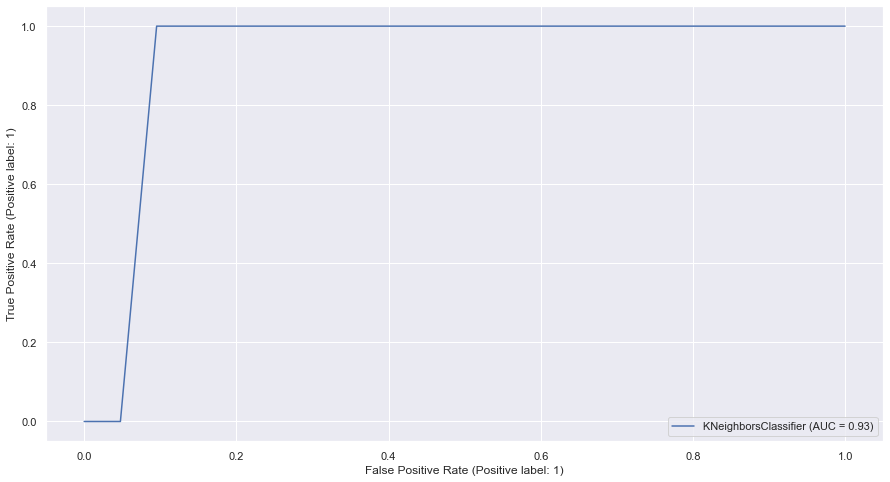

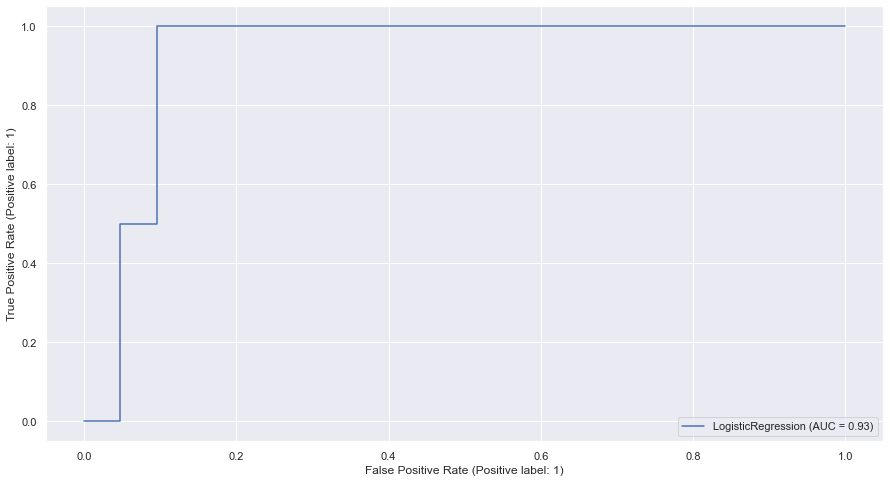

In [64]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<a class="anchor" id="decision"></a>
<br>
AUC is the same for both kNN Model and Logistic Model, so we decide to use kNN Model since it has a higher testing data accuracy.

In [66]:
# Performance measurements of kNN Model(Winning Model)
class_perf_measures(knn,X_test,y_test)

,Threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1
0,0.00,2,0,21,0,0.09,1.00,0.09,0.16
1,0.10,2,17,4,0,0.33,1.00,0.83,0.50
2,0.20,2,17,4,0,0.33,1.00,0.83,0.50
3,0.30,2,17,4,0,0.33,1.00,0.83,0.50
4,0.40,2,19,2,0,0.50,1.00,0.91,0.67
5,0.50,2,19,2,0,0.50,1.00,0.91,0.67
6,0.60,2,19,2,0,0.50,1.00,0.91,0.67
7,0.70,0,20,1,2,0.00,0.00,0.87,0.00
8,0.80,0,20,1,2,0.00,0.00,0.87,0.00
9,0.90,0,20,1,2,0.00,0.00,0.87,0.00


>**Interpretations of the Confusion Matrix(Task Completion):**
<br>
>1. Threshold: Indicates the smallest value the predicted probability must have for that record to be assigned to the positive class(1).<br>
>2. TP(True Positive): Predict the task will complete and the task actually complete.<br>
>3. TN(True Negative): Predict the task will not complete and the task actually do not complete.<br>
>4. FP(False Positive): Predict the task will complete but the task actaully do not complete.<br>
>5. FN(False Negative): Predict the task will not complete but the task actually complete.<br>
>6. Precison: TP/(TP+FP)
>7. Recall: TP/(TP+FN)
>8. Accuracy: (TP+TN)/n
>9. ErrorRate: (FP+FN)/n
>10. n = TP + TN + FP + FN = 23

1. **Prob Threshold = 0.2**:
    - Prob Thresold = 0.2 means that the predicted probabiltiy must be greater or equal to 0.2 for that record to be assigned to positive class(1). 1 in this confusion matrix means task completed.
    - Number of False Positives(FP): 4
    - 4 means that there are 4 times when model predict the task will complete but the task actaully do not complete. 
    - In the real world, FP might be very costly in this case since the company will not input extra effort and resources into the task based on model's prediction. But all will be in vain when the task do not complete, and the company wastes a lot of effort and resources and fail to complete the task.
    - Number of False Negatives(FN): 0
    - 0 means that there are 0 times when model predict the task will not complete but the task actually complete.
    - In the real world, FN might not be costly since the company will input extra effort and resources into the task based on the model's prediction. But without the extra effort and resources, the task can still be completed, so the extra effort and resources are wasted. Although there might be some redundant effort and resources, at least the task is completed.
<br><br>
2. **Prob Threshold = 0.6**:
    - Prob Thresold = 0.6 means that the predicted probabiltiy must be greater or equal to 0.6 for that record to be assigned to positive class(1). 2 in this confusion matrix means task completed.
    - Number of False Positives(FP): 2
    - 2 means that there are 2 times when model predict the task will complete but the task actaully do not complete. 
    - In the real world, FP might be very costly in this case since the company will not input extra effort and resources into the task based on model's prediction. But all will be in vain when the task do not complete, and the company wastes a lot of effort and resources and fail to complete the task.
    - Number of False Negatives(FN): 0
    - 0 means that there are 0 times when model predict the task will not complete but the task actually complete.
    - In the real world, FN might not be costly since the company will input extra effort and resources into the task based on the model's prediction. But without the extra effort and resources, the task can still be completed, so the extra effort and resources are wasted. Although there might be some redundant effort and resources, at least the task is completed.
<br><br>
3. **Prob Threshold = 0.8**:
    - Prob Thresold = 0.8 means that the predicted probabiltiy must be greater or equal to 0.8 for that record to be assigned to positive class(1). 1 in this confusion matrix means task completed.
    - Number of False Positives(FP): 1
    - 1 means that there are 1 times when model predict the task will complete but the task actaully do not complete. 
    - In the real world, FP might be very costly in this case since the company will not input extra effort and resources into the task based on model's prediction. But all will be in vain when the task do not complete, and the company wastes a lot of effort and resources and fail to complete the task.
    - Number of False Negatives(FN): 2
    - 2 means that there are 2 times when model predict the task will not complete but the task actually complete.
    - In the real world, FN might not be costly since the company will input extra effort and resources into the task based on the model's prediction. But without the extra effort and resources, the task can still be completed, so the extra effort and resources are wasted. Although there might be some redundant effort and resources, at least the task is completed.
<br><br>
4. **Final Decision for Prob Threshold:**
   - Our final decision for Prob Threshold is 0.8.
   - In this case, False Positives(FP) are more costly than False Negatives(FN). So we are focusing on making False Positive number as small as possible, and the 0.8 threshold has the lowest number of False Positives among the three thresholds above.

# 6.References and Sources<a class="anchor" id="references-sources"></a>
* [Go to Top](#table-of-content)

>1. **Picture in Problem Introduction and Movitation:** https://d57439wlqx3vo.cloudfront.net/iblock/f5d/f5dcf76697107ea302a1981718e33c95/1f68f84b53199df9cae4b253225eae63.png<br>
>2. **Machine Learning Basics with the K-Nearest Neighbors Algorithm** https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

# 7.Deployment<a class="anchor" id="deployment"></a>
* [Go to Top](#table-of-content)

>**Deployment using dash:**<a class="anchor" id="deployment"></a>
<br>
According to the above case, False Positives(FP) are more costly than False Negatives(FN). So we want to create a app to help people find out the number of False Postives for different thresholds.

In [ ]:
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

app.layout = html.Div(
    [
        html.H1('False Positive Numbers for different thresholds：'),
        html.Br(),
        dcc.Dropdown(
            id='threshold',
            options=[
                {'label': '0.00', 'value': '0.00'},
                {'label': '0.10', 'value': '0.10'},
                {'label': '0.20', 'value': '0.20'},
                {'label': '0.30', 'value': '0.30'},
                {'label': '0.40', 'value': '0.40'},
                {'label': '0.50', 'value': '0.50'},
                {'label': '0.60', 'value': '0.60'},
                {'label': '0.70', 'value': '0.70'},
                {'label': '0.80', 'value': '0.80'},
                {'label': '0.90', 'value': '0.90'},
                {'label': '1.00', 'value': '1.00'},
            ],
            value='0.00'
        ),
        html.P(id='parent')
    ]
)

threshold_dict = {
    '0.00': '21',
    '0.10': '4',
    '0.20': '4',
    '0.30': '4',
    '0.40': '2',
    '0.50': '2',
    '0.60': '2',
    '0.70': '1',
    '0.80': '1',
    '0.90': '1',
    '1.00': '1',
}

@app.callback(Output('parent', 'children'),
              Input('threshold', 'value'))
def thresholdFP(threshold):

    return threshold_dict[threshold]

if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


/var/folders/qn/b83j31g56rg2d51wzvlbt_n00000gn/T/ipykernel_50732/1515343374.py:2: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/var/folders/qn/b83j31g56rg2d51wzvlbt_n00000gn/T/ipykernel_50732/1515343374.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [18/Oct/2022 19:38:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 19:38:31] "GET /_dash-component-suites/dash/deps/react@16.v2_6_2m1666066896.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 19:38:31] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_6_2m1666066896.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 19:38:31] "GET /_dash-component-suites/dash/dash-renderer/build/